In [ ]:
# Install dependencies (if needed)
!pip install wordcloud

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
#Download nltk resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("Airline-Sentiment-2-w-AA.csv", encoding='latin1')  # Read the csv file with latin1 encoding
print(df.head())
print("Airlines:", df['airline'].unique())
print("Sentiment counts:\n", df['airline_sentiment'].value_counts())

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  681448150    False   finalized                   3      2/25/15 5:24   
1  681448153    False   finalized                   3      2/25/15 1:53   
2  681448156    False   finalized                   3     2/25/15 10:01   
3  681448158    False   finalized                   3      2/25/15 3:05   
4  681448159    False   finalized                   3      2/25/15 5:50   

  airline_sentiment  airline_sentiment:confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason:confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'@\w+|\#','', text)  # remove @mentions and hashtags
    text = re.sub(r'[^a-z\s]','', text) # keep only letters
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df[['text','clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'@\w+|\#','', text)  # remove @mentions and hashtags
    text = re.sub(r'[^a-z\s]','', text) # keep only letters
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df[['text','clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


/tmp/ipython-input-1409008598.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ri_scores.index, y=ri_scores['RI'], palette="coolwarm")


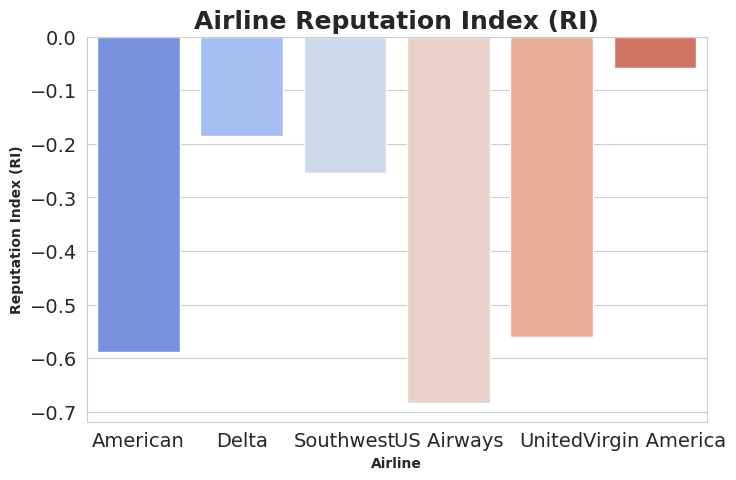

Reputation Index Scores:
 airline
American         -0.588619
Delta            -0.184968
Southwest        -0.254545
US Airways       -0.684518
United           -0.560178
Virgin America   -0.057540
Name: RI, dtype: float64


In [ ]:
# Reputation Index = (Positive - Negative) / Total
ri_scores = df.groupby('airline')['airline_sentiment'].value_counts().unstack().fillna(0)
ri_scores['RI'] = (ri_scores['positive'] - ri_scores['negative']) / ri_scores.sum(axis=1)

# Plot RI
plt.figure(figsize=(8,5))
sns.barplot(x=ri_scores.index, y=ri_scores['RI'], palette="coolwarm")
plt.title("Airline Reputation Index (RI)")
plt.ylabel("Reputation Index (RI)")
plt.xlabel("Airline")
plt.show()

print("Reputation Index Scores:\n", ri_scores['RI'])


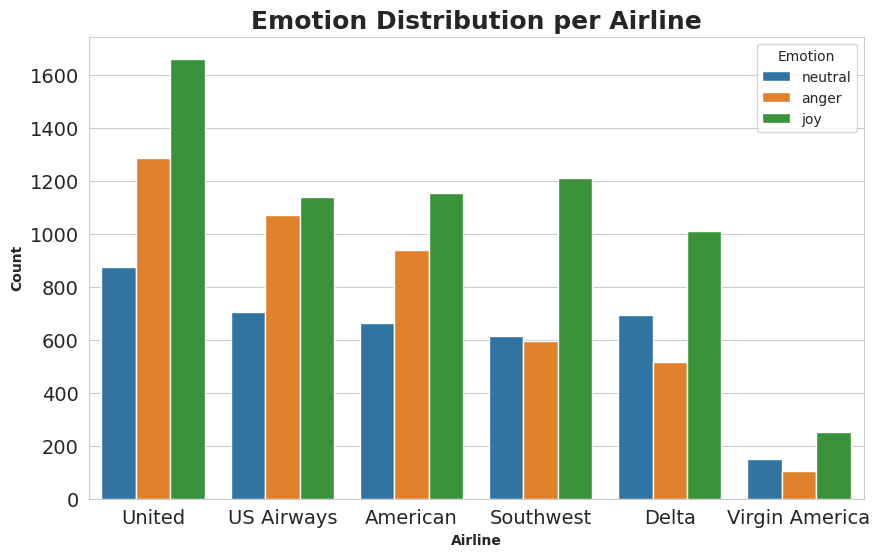

In [ ]:
sid = SentimentIntensityAnalyzer()

def get_emotion(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return "joy"
    elif scores['compound'] <= -0.05:
        return "anger"
    else:
        return "neutral"

df['emotion'] = df['clean_text'].apply(get_emotion)

# Emotion distribution per airline
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="airline", hue="emotion",
              order=df['airline'].value_counts().index)
plt.title("Emotion Distribution per Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.legend(title="Emotion")
plt.show()


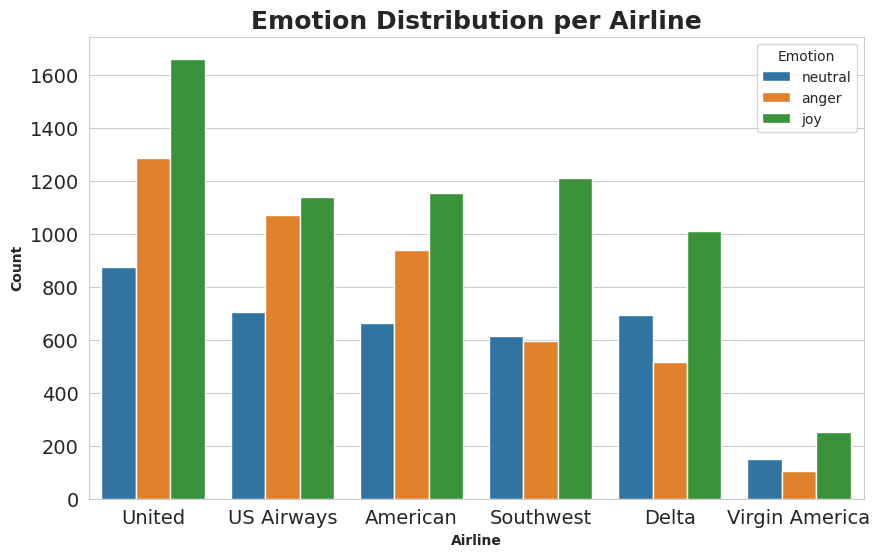

In [ ]:
sid = SentimentIntensityAnalyzer()

def get_emotion(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return "joy"
    elif scores['compound'] <= -0.05:
        return "anger"
    else:
        return "neutral"

df['emotion'] = df['clean_text'].apply(get_emotion)

# Emotion distribution per airline
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="airline", hue="emotion",
              order=df['airline'].value_counts().index)
plt.title("Emotion Distribution per Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.legend(title="Emotion")
plt.show()


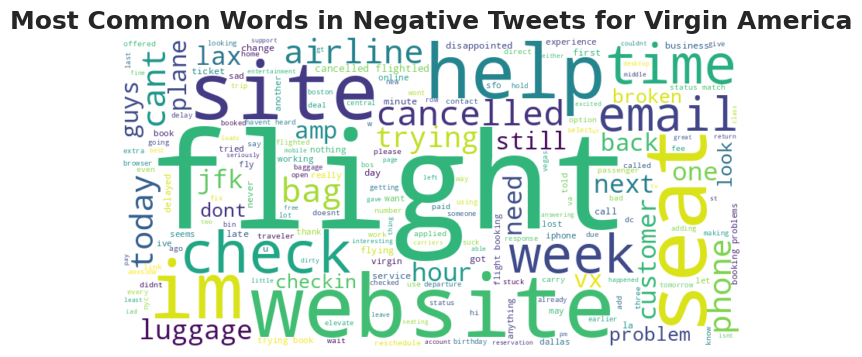

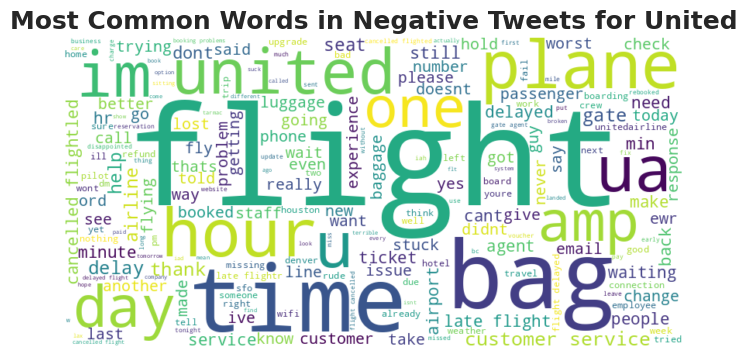

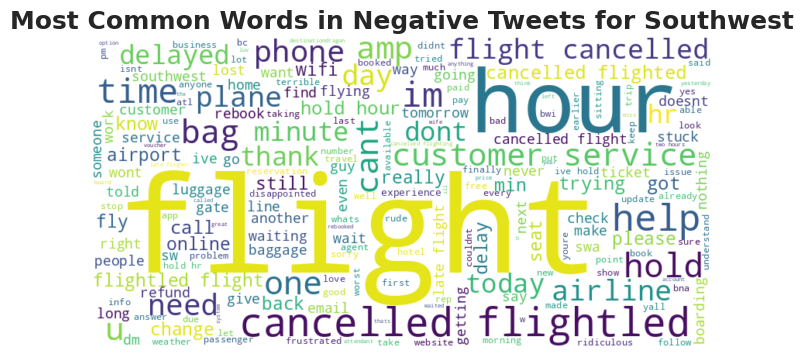

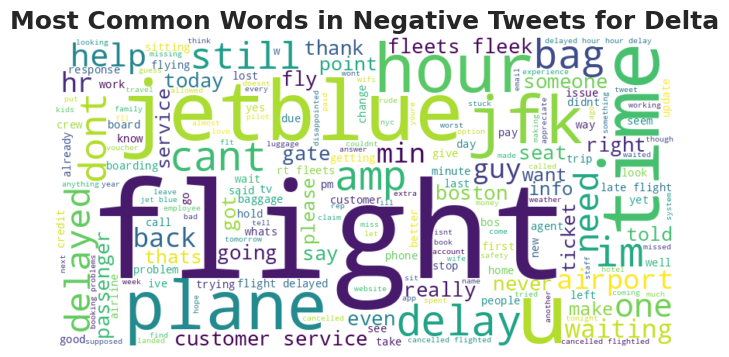

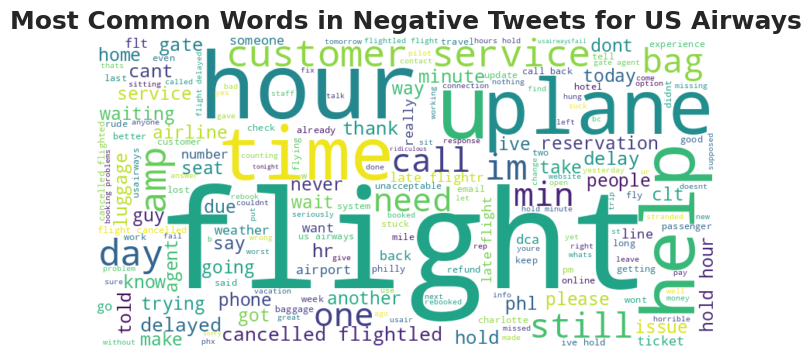

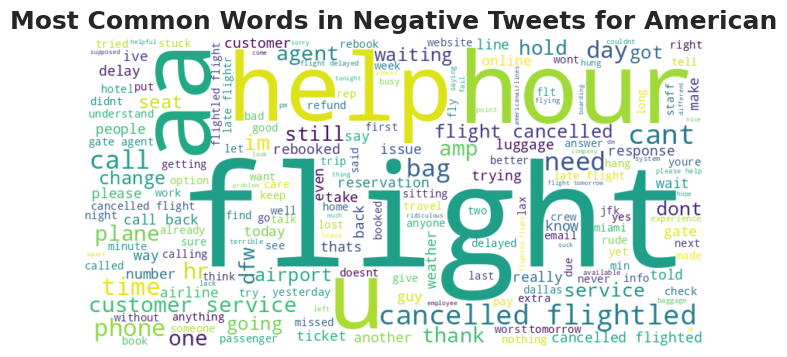

In [ ]:
airlines = df['airline'].unique()

for airline in airlines:
    neg_tweets = df[(df['airline']==airline) & (df['airline_sentiment']=="negative")]
    text = " ".join(neg_tweets['clean_text'])
    if len(text) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
        plt.figure(figsize=(8,5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Most Common Words in Negative Tweets for {airline}")
        plt.show()


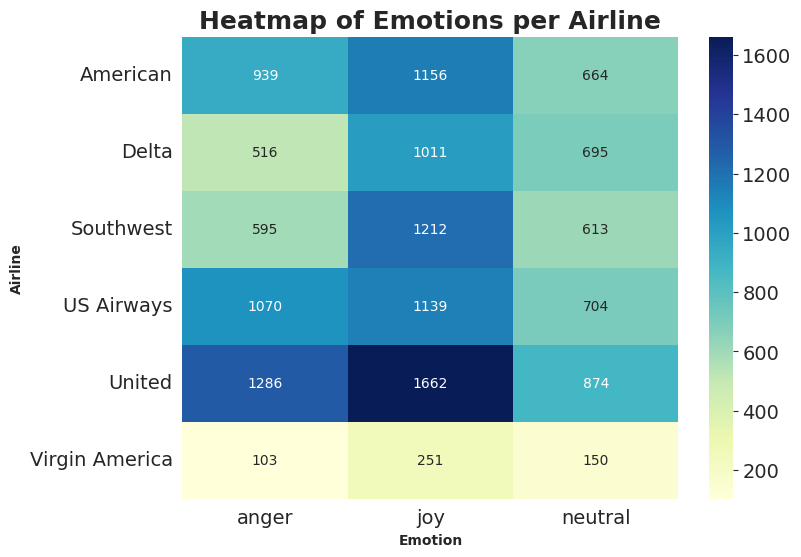

In [ ]:
emotion_counts = pd.crosstab(df['airline'], df['emotion'])

plt.figure(figsize=(8,6))
sns.heatmap(emotion_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Emotions per Airline")
plt.ylabel("Airline")
plt.xlabel("Emotion")
plt.show()
